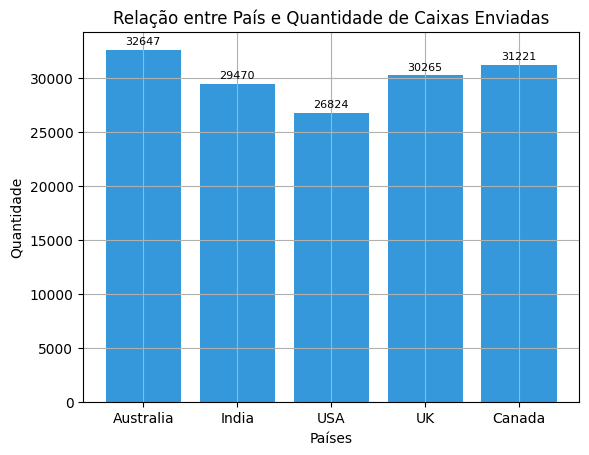

In [65]:
import matplotlib.pyplot as plt  # Importa a biblioteca para criar gráficos
import pandas as pd  # Importa a biblioteca para manipulação de dados em formato de tabela

# Carrega o dataset a partir de um arquivo CSV e armazena em um DataFrame chamado df
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

# Remove espaços em branco extras nos nomes dos países para garantir que não haja inconsistências
df["Country"] = df["Country"].str.strip()

# Define uma lista de países que queremos analisar
expected_countries = ["Australia", "India", "USA", "UK", "Canada"]

# Filtra o DataFrame df para incluir apenas as linhas onde o país está na lista de países esperados
filtered_df = df[df["Country"].isin(expected_countries)]  # Cria um novo DataFrame apenas com os países da lista

# Para cada país na lista de países esperados, soma o total de 'Boxes Shipped' (caixas enviadas)
boxes_shipped = [filtered_df[filtered_df["Country"] == country]["Boxes Shipped"].sum() for country in expected_countries]

# Cria um gráfico de barras onde o eixo x são os países e o eixo y é a quantidade de caixas enviadas
plt.bar(expected_countries, boxes_shipped, color="#3498db")  # Define a cor das barras

# Configurações do gráfico
plt.title('Relação entre País e Quantidade de Caixas Enviadas')  # Define o título do gráfico
plt.xlabel('Países')  # Define o rótulo do eixo x
plt.ylabel('Quantidade')  # Define o rótulo do eixo y
plt.grid(True)  # Adiciona uma grade ao gráfico para melhor visualização

# Adiciona os valores de 'Boxes Shipped' acima de cada barra no gráfico
for i, v in enumerate(boxes_shipped):  # Para cada índice i e valor v na lista boxes_shipped
    plt.text(i, v + 500, str(v), ha='center', fontsize=8, color='black')  # Adiciona o texto no gráfico

plt.show()  # Exibe o gráfico na tela

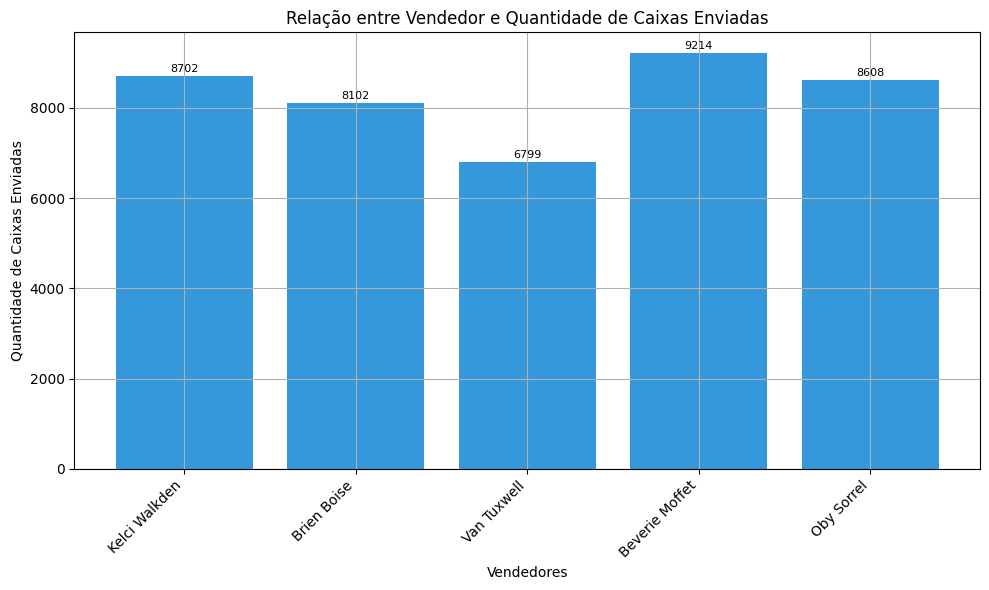

In [75]:
# Removendo espaços extras e garantindo consistência nos nomes dos vendedores
df["Sales Person"] = df["Sales Person"].str.strip()  # Remove espaços em branco no início e no final dos nomes dos vendedores

# Verificando se os vendedores esperados estão no dataset
expected_person = ["Kelci Walkden", "Brien Boise", "Van Tuxwell", "Beverie Moffet", "Oby Sorrel"]  # Lista de vendedores que queremos analisar

# Filtrando apenas os vendedores da lista
filtered_df = df[df["Sales Person"].isin(expected_person)]  # Cria um novo DataFrame apenas com os vendedores da lista esperada

# Somando os valores de 'Boxes Shipped' para cada vendedor
boxes_shipped = [filtered_df[filtered_df["Sales Person"] == person]["Boxes Shipped"].sum() for person in expected_person]  
# Para cada vendedor na lista esperada, soma o total de 'Boxes Shipped' (caixas enviadas)

# Configurando o tamanho da figura explicitamente para evitar problemas de renderização
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Gráfico de barras
plt.bar(expected_person, boxes_shipped, color="#3498db")  # Cria um gráfico de barras com os vendedores no eixo x e as caixas enviadas no eixo y

# Configurações do gráfico
plt.title('Relação entre Vendedor e Quantidade de Caixas Enviadas')  # Define o título do gráfico
plt.xlabel('Vendedores')  # Define o rótulo do eixo x
plt.ylabel('Quantidade de Caixas Enviadas')  # Define o rótulo do eixo y
plt.grid(True)  # Adiciona uma grade ao gráfico para melhor visualização

# Adicionando os valores acima das barras
for i, v in enumerate(boxes_shipped):  # Para cada índice i e valor v na lista boxes_shipped
    plt.text(i, v + 100, str(v), ha='center', fontsize=8, color='black')  # Adiciona o valor de 'Boxes Shipped' acima da barra correspondente

# Rotacionando os nomes dos vendedores para melhor legibilidade
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x em 45 graus para melhor visualização

# Ajustando o layout para evitar sobreposição
plt.tight_layout()  # Ajusta o layout do gráfico para evitar que elementos se sobreponham

# Exibindo o gráfico
plt.show()  # Exibe o gráfico na tela

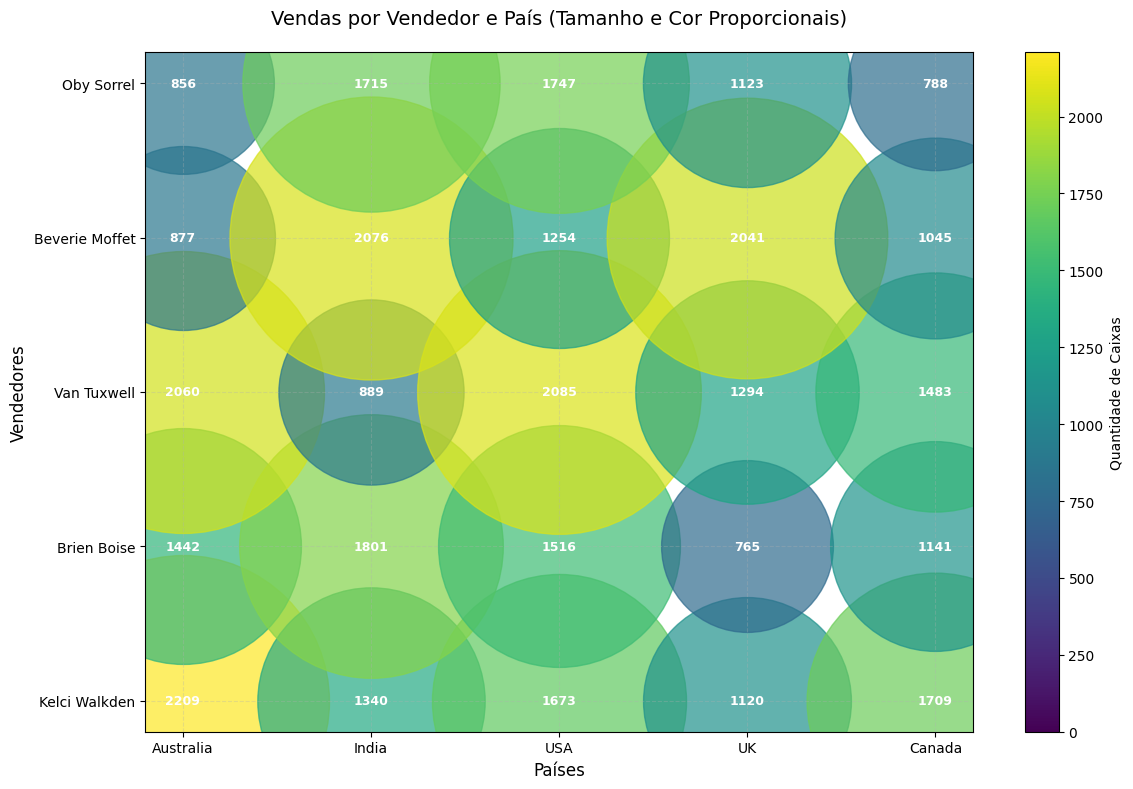

In [67]:
import matplotlib.pyplot as plt  # Importa a biblioteca para criar gráficos
import pandas as pd  # Importa a biblioteca para manipulação de dados em formato de tabela

# Carregando o dataset a partir de um arquivo CSV e armazenando em um DataFrame chamado df
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

# Removendo espaços extras nos nomes dos vendedores e países para garantir consistência
df["Sales Person"] = df["Sales Person"].str.strip()  # Remove espaços em branco no início e no final dos nomes dos vendedores
df["Country"] = df["Country"].str.strip()  # Remove espaços em branco no início e no final dos nomes dos países

# Define listas de vendedores e países esperados para análise
expected_person = ["Kelci Walkden", "Brien Boise", "Van Tuxwell", "Beverie Moffet", "Oby Sorrel"]  # Lista de vendedores
expected_countries = ["Australia", "India", "USA", "UK", "Canada"]  # Lista de países

# Filtra o DataFrame df para incluir apenas as linhas onde o vendedor e o país estão nas listas esperadas
filtered_df = df[df["Sales Person"].isin(expected_person) & df["Country"].isin(expected_countries)]  # Cria um novo DataFrame com os dados filtrados

# Pivotando os dados para criar uma tabela dinâmica
# A tabela terá os vendedores como índice, os países como colunas e a soma de 'Boxes Shipped' como valores
pivot_df = filtered_df.pivot_table(index="Sales Person", columns="Country", values="Boxes Shipped", aggfunc="sum", fill_value=0)

# Criando uma figura e um eixo para o gráfico
fig, ax = plt.subplots(figsize=(12, 8))  # Define o tamanho da figura do gráfico

# Gráfico de dispersão com tamanho e cor variáveis
for i, person in enumerate(pivot_df.index):  # Para cada vendedor na tabela dinâmica
    for j, country in enumerate(pivot_df.columns):  # Para cada país na tabela dinâmica
        value = pivot_df.loc[person, country]  # Obtém o valor de 'Boxes Shipped' para o vendedor e país
        if value > 0:  # Verifica se o valor é maior que zero
            # Tamanho proporcional ao valor
            size = value * 20  # Define o tamanho do ponto proporcional ao valor
            # Cor baseada no valor (normalizada)
            color = plt.cm.viridis(value / pivot_df.values.max())  # Define a cor do ponto com base no valor normalizado
            ax.scatter(j, i, s=size, c=[color], alpha=0.7)  # Plota o ponto no gráfico
            ax.text(j, i, f"{int(value)}", ha="center", va="center", fontsize=9, color="white", weight="bold")  # Adiciona o valor ao ponto

# Configurações do gráfico
ax.set_title("Vendas por Vendedor e País (Tamanho e Cor Proporcionais)", fontsize=14, pad=20)  # Define o título do gráfico
ax.set_xlabel("Países", fontsize=12)  # Define o rótulo do eixo x
ax.set_ylabel("Vendedores", fontsize=12)  # Define o rótulo do eixo y
ax.set_xticks(range(len(expected_countries)))  # Define os ticks do eixo x
ax.set_xticklabels(expected_countries)  # Define os rótulos do eixo x com os nomes dos países
ax.set_yticks(range(len(expected_person)))  # Define os ticks do eixo y
ax.set_yticklabels(expected_person)  # Define os rótulos do eixo y com os nomes dos vendedores
ax.grid(True, linestyle="--", alpha=0.3)  # Adiciona uma grade ao gráfico para melhor visualização

# Adicionando uma barra de cores para indicar a quantidade de caixas
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=pivot_df.values.max()))  # Cria uma barra de cores com a coloração viridis
plt.colorbar(sm, ax=ax, label="Quantidade de Caixas")  # Adiciona a barra de cores ao gráfico

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico na tela

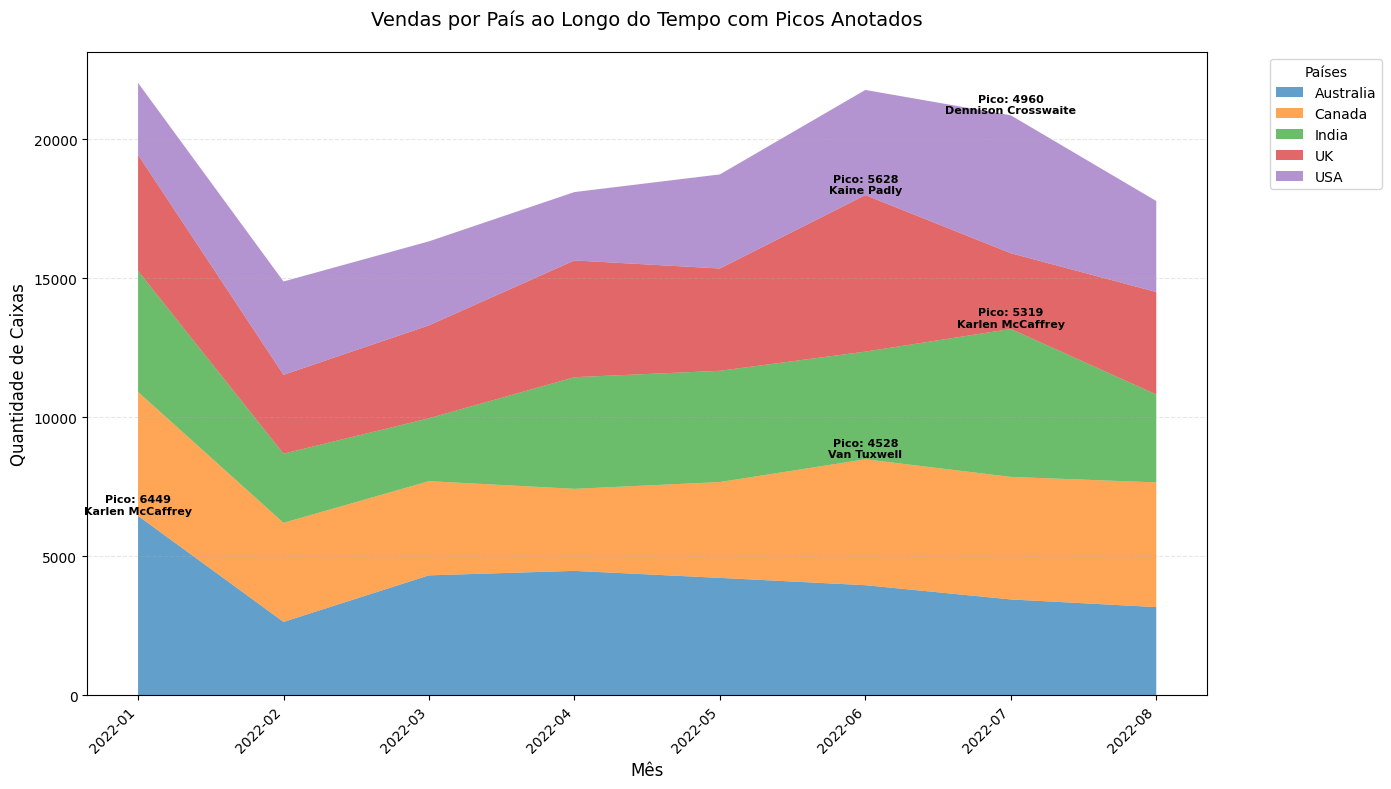

In [68]:
import matplotlib.pyplot as plt  # Importa a biblioteca para criar gráficos
import pandas as pd  # Importa a biblioteca para manipulação de dados em formato de tabela

# Carregando o dataset a partir de um arquivo CSV e armazenando em um DataFrame chamado df
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

# Removendo espaços extras e convertendo a coluna de data para o formato datetime
df["Country"] = df["Country"].str.strip()  # Remove espaços em branco no início e no final dos nomes dos países
df["Sales Person"] = df["Sales Person"].str.strip()  # Remove espaços em branco no início e no final dos nomes dos vendedores
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")  # Converte a coluna de data para o formato datetime
df["Month"] = df["Date"].dt.to_period("M").astype(str)  # Extrai o mês da data e o armazena como string

# Filtrando países esperados para análise
expected_countries = ["Australia", "India", "USA", "UK", "Canada"]  # Lista de países que queremos analisar
filtered_df = df[df["Country"].isin(expected_countries)]  # Cria um novo DataFrame apenas com os países da lista esperada

# Pivotando os dados por mês e país
monthly_sales = filtered_df.groupby(["Month", "Country"])["Boxes Shipped"].sum().unstack(fill_value=0)  
# Agrupa os dados por mês e país, somando 'Boxes Shipped' e preenchendo valores ausentes com 0
months = monthly_sales.index  # Obtém os meses da tabela pivotada

# Criando figura para o gráfico
fig, ax = plt.subplots(figsize=(14, 8))  # Define o tamanho da figura do gráfico

# Gráfico de área empilhada
ax.stackplot(months, monthly_sales.T, labels=monthly_sales.columns, alpha=0.7)  
# Cria um gráfico de área empilhada com os meses no eixo x e as vendas no eixo y

# Adicionando anotações de pico para cada país
for country in monthly_sales.columns:  # Para cada país na tabela de vendas mensais
    peak_value = monthly_sales[country].max()  # Obtém o valor máximo de vendas para o país
    peak_month = monthly_sales[country].idxmax()  # Obtém o mês correspondente ao pico de vendas
    peak_idx = months.get_loc(peak_month)  # Obtém o índice do mês do pico
    peak_df = filtered_df[filtered_df["Month"] == peak_month]  # Filtra os dados para o mês do pico
    top_salesperson = peak_df[peak_df["Country"] == country].groupby("Sales Person")["Boxes Shipped"].sum().idxmax()  
    # Obtém o vendedor com mais vendas no país durante o mês do pico
    total_height = monthly_sales.loc[peak_month].cumsum()[country]  # Calcula a altura total para o mês
    ax.text(peak_idx, total_height, f"Pico: {int(peak_value)}\n{top_salesperson}", 
            ha="center", va="bottom", fontsize=8, color="black", weight="bold")  
    # Adiciona texto ao gráfico com o valor do pico e o vendedor correspondente

# Configurações do gráfico
ax.set_title("Vendas por País ao Longo do Tempo com Picos Anotados", fontsize=14, pad=20)  # Define o título do gráfico
ax.set_xlabel("Mês", fontsize=12)  # Define o rótulo do eixo x
ax.set_ylabel("Quantidade de Caixas", fontsize=12)  # Define o rótulo do eixo y
ax.set_xticks(range(len(months)))  # Define os ticks do eixo x
ax.set_xticklabels(months, rotation=45, ha="right")  # Define os rótulos do eixo x com os meses, rotacionando para melhor legibilidade
ax.legend(title="Países", bbox_to_anchor=(1.05, 1), loc="upper left")  # Adiciona uma legenda ao gráfico
ax.grid(True, axis="y", linestyle="--", alpha=0.3)  # Adiciona uma grade ao gráfico para melhor visualização

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico na tela

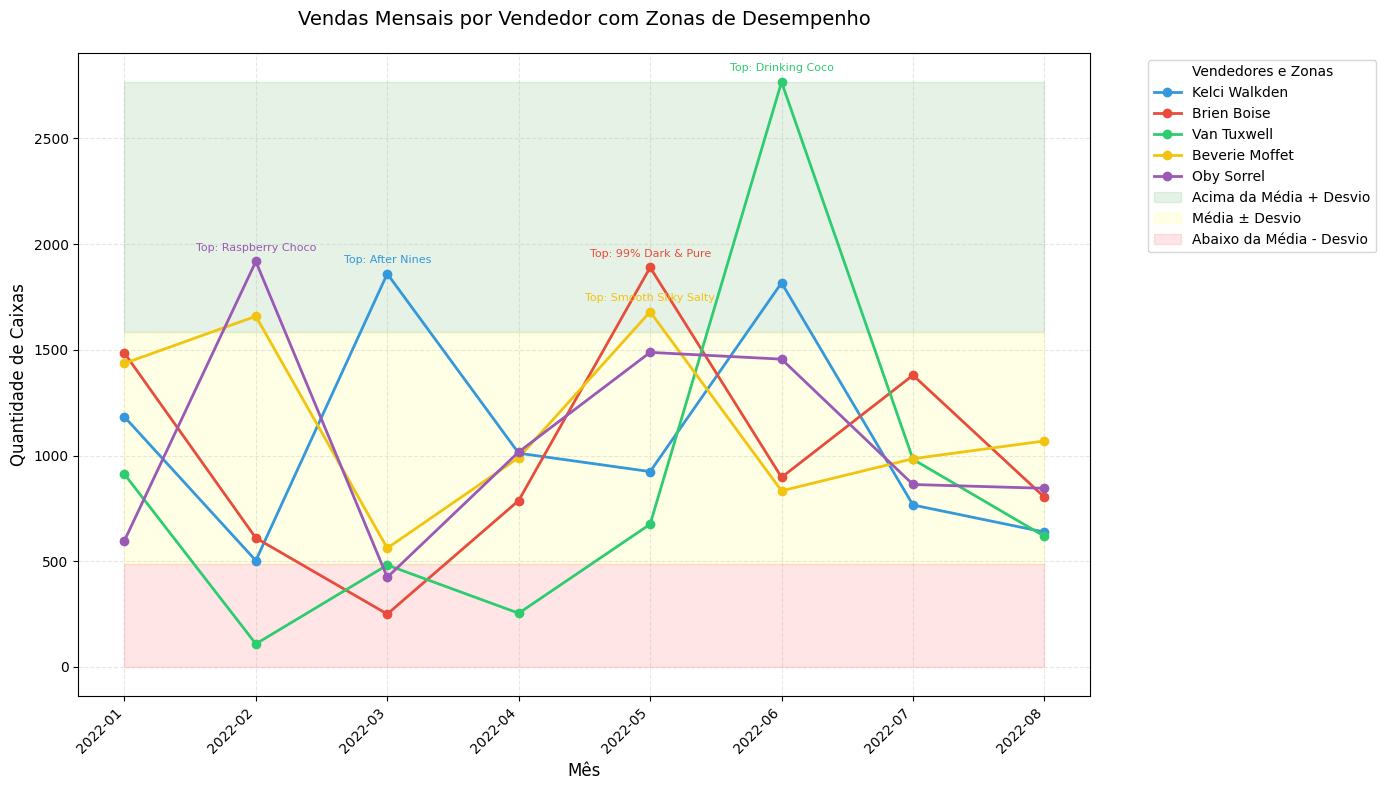

In [69]:
import matplotlib.pyplot as plt  # Importa a biblioteca para criar gráficos
import pandas as pd  # Importa a biblioteca para manipulação de dados em formato de tabela

# Carregando o dataset a partir de um arquivo CSV e armazenando em um DataFrame chamado df
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

# Removendo espaços extras e convertendo a coluna de data para o formato datetime
df["Sales Person"] = df["Sales Person"].str.strip()  # Remove espaços em branco no início e no final dos nomes dos vendedores
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")  # Converte a coluna de data para o formato datetime
df["Month"] = df["Date"].dt.to_period("M").astype(str)  # Extrai o mês da data e o armazena como string

# Filtrando vendedores esperados para análise
expected_person = ["Kelci Walkden", "Brien Boise", "Van Tuxwell", "Beverie Moffet", "Oby Sorrel"]  # Lista de vendedores que queremos analisar
filtered_df = df[df["Sales Person"].isin(expected_person)]  # Cria um novo DataFrame apenas com os vendedores da lista esperada

# Pivotando os dados por mês e vendedor
monthly_sales = filtered_df.groupby(["Month", "Sales Person"])["Boxes Shipped"].sum().unstack(fill_value=0)  
# Agrupa os dados por mês e vendedor, somando 'Boxes Shipped' e preenchendo valores ausentes com 0
months = monthly_sales.index  # Obtém os meses da tabela pivotada

# Calculando média e desvio padrão global das vendas
global_mean = monthly_sales.values.mean()  # Calcula a média global das vendas
global_std = monthly_sales.values.std()  # Calcula o desvio padrão global das vendas

# Criando figura para o gráfico
fig, ax = plt.subplots(figsize=(14, 8))  # Define o tamanho da figura do gráfico

# Plotando linhas para cada vendedor
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6"]  # Define cores para cada vendedor
for i, person in enumerate(expected_person):  # Para cada vendedor na lista esperada
    ax.plot(months, monthly_sales[person], marker="o", color=colors[i], label=person, linewidth=2)  
    # Plota a linha correspondente ao vendedor, com marcadores e cor definida

# Áreas de desempenho em relação à média e desvio padrão
ax.fill_between(months, global_mean + global_std, monthly_sales.values.max(), color="green", alpha=0.1, label="Acima da Média + Desvio")  
# Preenche a área acima da média + desvio padrão
ax.fill_between(months, global_mean - global_std, global_mean + global_std, color="yellow", alpha=0.1, label="Média ± Desvio")  
# Preenche a área entre a média - desvio padrão e a média + desvio padrão
ax.fill_between(months, 0, global_mean - global_std, color="red", alpha=0.1, label="Abaixo da Média - Desvio")  
# Preenche a área abaixo da média - desvio padrão

# Anotações do produto mais vendido por vendedor
for person in expected_person:  # Para cada vendedor na lista esperada
    person_df = filtered_df[filtered_df["Sales Person"] == person]  # Filtra os dados para o vendedor
    top_product = person_df.groupby("Product")["Boxes Shipped"].sum().idxmax()  # Obtém o produto mais vendido pelo vendedor
    peak_value = monthly_sales[person].max()  # Obtém o valor máximo de vendas do vendedor
    peak_idx = monthly_sales[person].idxmax()  # Obtém o índice do mês do pico de vendas
    ax.text(months.get_loc(peak_idx), peak_value + 50, f"Top: {top_product}", ha="center", fontsize=8, color=colors[expected_person.index(person)])  
    # Adiciona texto ao gráfico com o nome do produto mais vendido, acima do pico de vendas

# Configurações do gráfico
ax.set_title("Vendas Mensais por Vendedor com Zonas de Desempenho", fontsize=14, pad=20)  # Define o título do gráfico
ax.set_xlabel("Mês", fontsize=12)  # Define o rótulo do eixo x
ax.set_ylabel("Quantidade de Caixas", fontsize=12)  # Define o rótulo do eixo y
ax.set_xticks(range(len(months)))  # Define os ticks do eixo x
ax.set_xticklabels(months, rotation=45, ha="right")  # Define os rótulos do eixo x com os meses, rotacionando para melhor legibilidade
ax.legend(title="Vendedores e Zonas", bbox_to_anchor=(1.05, 1), loc="upper left")  # Adiciona uma legenda ao gráfico
ax.grid(True, linestyle="--", alpha=0.3)  # Adiciona uma grade ao gráfico para melhor visualização

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico na tela

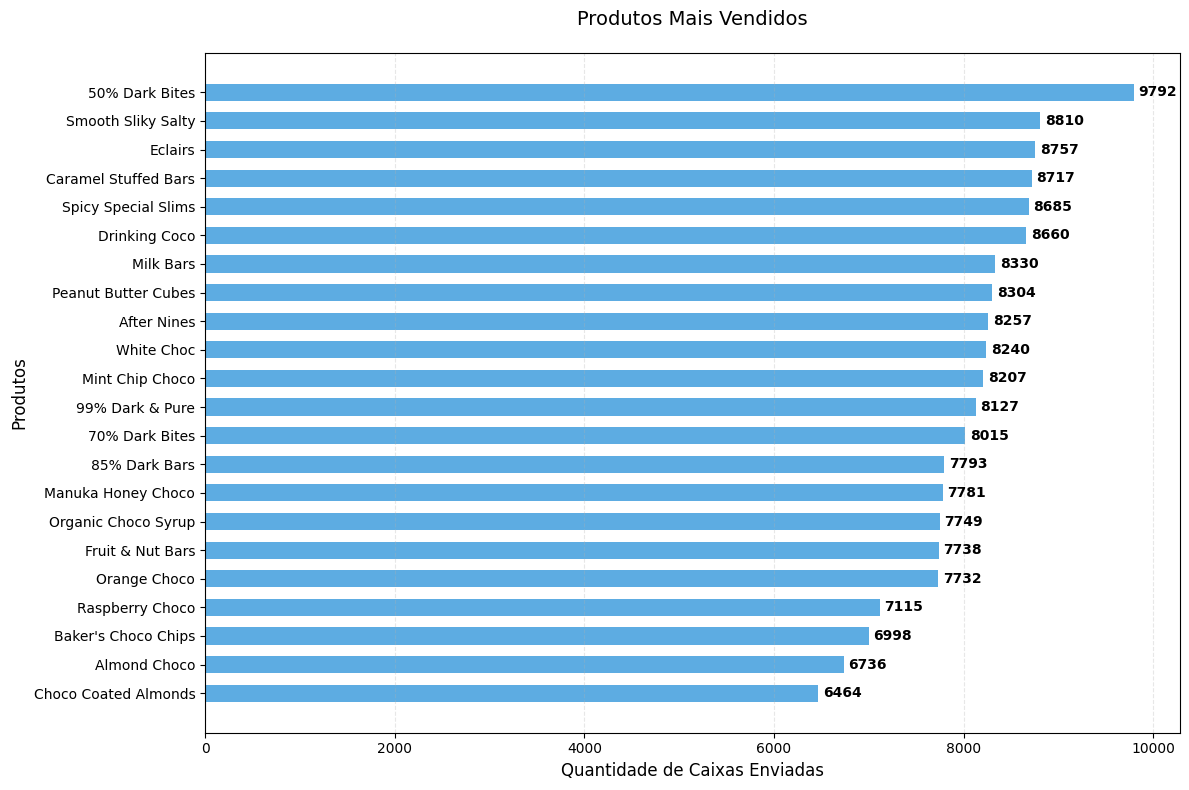

In [70]:
import matplotlib.pyplot as plt  # Importa a biblioteca para criar gráficos
import pandas as pd  # Importa a biblioteca para manipulação de dados em formato de tabela

# Carregando o dataset a partir de um arquivo CSV e armazenando em um DataFrame chamado df
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

# Removendo espaços extras nos nomes dos produtos para garantir consistência
df["Product"] = df["Product"].str.strip()  # Remove espaços em branco no início e no final dos nomes dos produtos

# Calculando o total de caixas enviadas por produto
total_boxes_by_product = df.groupby("Product")["Boxes Shipped"].sum().sort_values(ascending=True)  
# Agrupa os dados por produto, soma as caixas enviadas e ordena os resultados em ordem crescente

# Criando figura para o gráfico
fig, ax = plt.subplots(figsize=(12, 8))  # Define o tamanho da figura do gráfico

# Gráfico de barras horizontais
bars = ax.barh(total_boxes_by_product.index, total_boxes_by_product, color="#3498db", alpha=0.8, height=0.6)  
# Cria um gráfico de barras horizontais com os produtos no eixo y e a quantidade de caixas no eixo x

# Configurações do gráfico
ax.set_title("Produtos Mais Vendidos", fontsize=14, pad=20)  # Define o título do gráfico
ax.set_xlabel("Quantidade de Caixas Enviadas", fontsize=12)  # Define o rótulo do eixo x
ax.set_ylabel("Produtos", fontsize=12)  # Define o rótulo do eixo y
ax.grid(True, axis="x", linestyle="--", alpha=0.3)  # Adiciona uma grade ao gráfico no eixo x para melhor visualização

# Adicionando valores ao lado das barras
for bar in bars:  # Para cada barra no gráfico
    width = bar.get_width()  # Obtém a largura da barra (quantidade de caixas)
    ax.text(width + 50, bar.get_y() + bar.get_height() / 2, f"{int(width)}", 
            va="center", fontsize=10, color="black", weight="bold")  
    # Adiciona o valor da quantidade de caixas ao lado da barra, centralizado verticalmente

# Ajustando o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()  
plt.show()  # Exibe o gráfico na tela

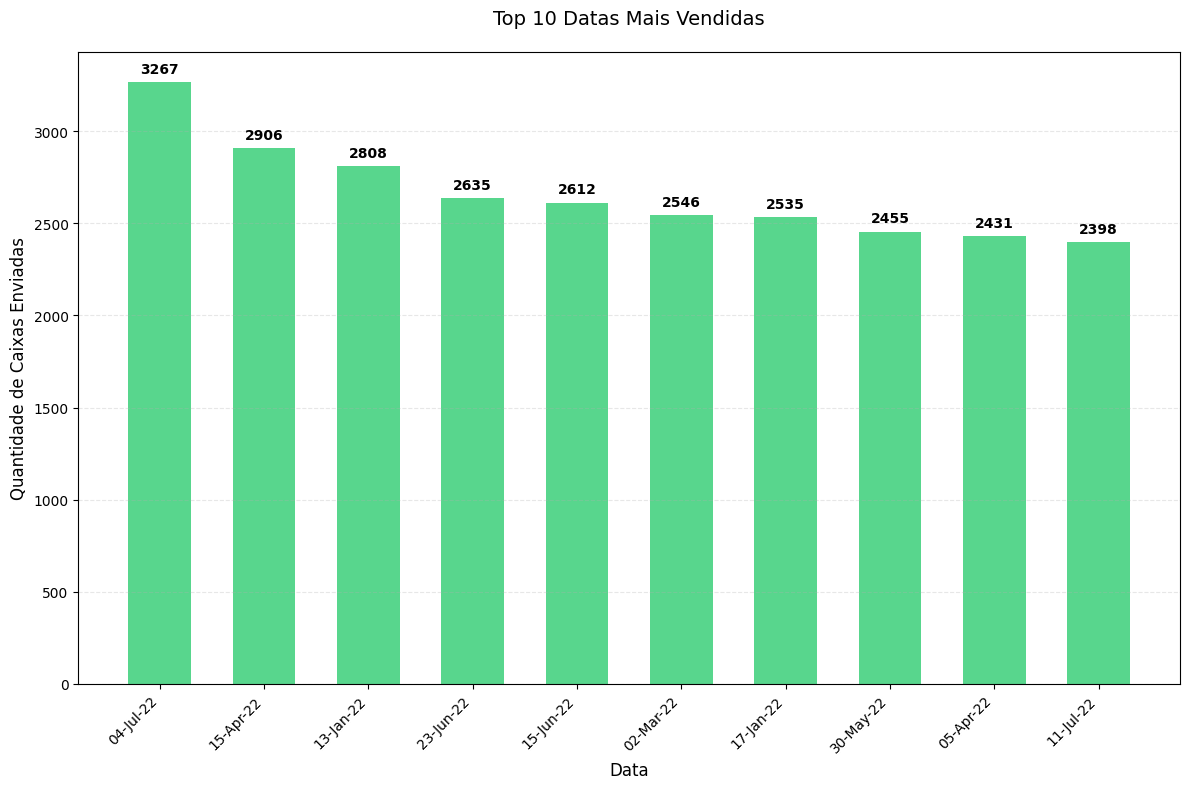

In [71]:
import matplotlib.pyplot as plt  # Importa a biblioteca para criar gráficos
import pandas as pd  # Importa a biblioteca para manipulação de dados em formato de tabela

# Carregando o dataset a partir de um arquivo CSV e armazenando em um DataFrame chamado df
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

# Removendo espaços extras e convertendo a coluna de data para o formato datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")  # Converte a coluna de data para o formato datetime

# Calculando o total de caixas enviadas por data
total_boxes_by_date = df.groupby("Date")["Boxes Shipped"].sum().sort_values(ascending=False)  
# Agrupa os dados por data, soma as caixas enviadas e ordena os resultados em ordem decrescente

# Selecionando as top 10 datas mais vendidas
top_10_dates = total_boxes_by_date.head(10)  # Obtém as 10 datas com mais caixas enviadas

# Criando figura para o gráfico
fig, ax = plt.subplots(figsize=(12, 8))  # Define o tamanho da figura do gráfico

# Gráfico de barras verticais
bars = ax.bar(range(len(top_10_dates)), top_10_dates, color="#2ecc71", alpha=0.8, width=0.6)  
# Cria um gráfico de barras verticais com as top 10 datas no eixo x e a quantidade de caixas no eixo y

# Configurações do gráfico
ax.set_title("Top 10 Datas Mais Vendidas", fontsize=14, pad=20)  # Define o título do gráfico
ax.set_xlabel("Data", fontsize=12)  # Define o rótulo do eixo x
ax.set_ylabel("Quantidade de Caixas Enviadas", fontsize=12)  # Define o rótulo do eixo y
ax.grid(True, axis="y", linestyle="--", alpha=0.3)  # Adiciona uma grade ao gráfico no eixo y para melhor visualização

# Adicionando valores acima das barras
for bar in bars:  # Para cada barra no gráfico
    height = bar.get_height()  # Obtém a altura da barra (quantidade de caixas)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f"{int(height)}", 
            ha="center", fontsize=10, color="black", weight="bold")  
    # Adiciona o valor da quantidade de caixas acima da barra, centralizado horizontalmente

# Definindo os ticks e rótulos do eixo x corretamente
ax.set_xticks(range(len(top_10_dates)))  # Define os ticks do eixo x
ax.set_xticklabels(top_10_dates.index.strftime("%d-%b-%y"), rotation=45, ha="right")  
# Define os rótulos do eixo x com as datas formatadas, rotacionando para melhor legibilidade

# Ajustando o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()  
plt.show()  # Exibe o gráfico na tela